# Memahami Decision Tree: Dari Konsep Hingga Perhitungan

Decision Tree (Pohon Keputusan) adalah algoritma *machine learning* yang membangun model prediksi dalam bentuk struktur pohon. Algoritma ini memecah dataset menjadi himpunan data yang lebih kecil dan lebih murni secara bertahap, di mana setiap pemecahan didasarkan pada fitur data yang memberikan informasi paling banyak.

---




### Studi Kasus: Dataset Prediksi Aktivitas

Kita akan menggunakan studi kasus dengan 15 data untuk memprediksi `Aktivitas` berdasarkan `Suhu` dan `Kelembaban`. Tujuannya adalah membangun model yang bisa menjawab: "Dengan kondisi Suhu dan Kelembaban tertentu, aktivitas apa yang paling mungkin dilakukan?"
berikut cuplikan datanya
data suhu, kelembapan dan aktivitas

| Suhu (°C) | Kelembaban (%) | Aktivitas |
|:---:|:---:|:---|
| 18 | 75 | Belajar |
| 21 | 60 | Bermain |
| 30 | 85 | Istirahat |
| 25 | 70 | Bermain |
| 32 | 90 | Istirahat |
| 17 | 55 | Belajar |
| 22 | 65 | Bermain |
| 28 | 78 | Belajar |
| 34 | 88 | Istirahat |
| 19 | 50 | Belajar |
| 27 | 72 | Bermain |
| 29 | 95 | Istirahat |
| 20 | 45 | Belajar |
| 26 | 80 | Bermain |
| 31 | 83 | Istirahat |

### Perhitungan Manual Lengkap

Untuk melihat detail perhitungan Entropy dan Information Gain secara manual langkah demi langkah, Anda bisa merujuk pada spreadsheet berikut:

[Perhitungan Manual Decision Tree di Google Sheets](https://docs.google.com/spreadsheets/d/1ze6s7lJJF80Gi8F8uT4agDDTlD75SlR8/edit?usp=sharing&ouid=118339560445514012978&rtpof=true&sd=true)

Spreadsheet ini menunjukkan bagaimana angka-angka Entropy dan Information Gain yang kita hitung di notebook ini didapatkan dari data awal, memperjelas proses di balik algoritma Decision Tree.


---
### Konsep dan Rumus Inti

#### **1. Entropy (Ukuran Ketidakpastian)**
Entropy mengukur "keacakan" dalam sebuah kelompok data. Nilai 0 menandakan kelompok yang murni (semua isinya sama), sedangkan nilai yang lebih tinggi menandakan kelompok yang lebih beragam.

$$Entropy(S) = \sum_{i=1}^{c} -p_i \log_2(p_i)$$
* $p_i$ adalah proporsi kelas ke-i.

#### **2. Information Gain (Pengurangan Ketidakpastian)**
Information Gain mengukur seberapa efektif sebuah fitur dalam mengurangi entropy (ketidakpastian). Fitur dengan Gain tertinggi adalah yang terbaik untuk memecah data.

$$Gain(S, A) = Entropy(S) - \text{Rata-rata Entropy Tertimbang Fitur A}$$

---
### **Proses Pembangunan Pohon (Lengkap dengan Perhitungan)**

#### **Langkah 1: Menghitung Entropy Total Dataset (Entropy(S))**

Pertama, kita hitung entropy awal dari keseluruhan 15 data.
* **Distribusi Data:** 5 Belajar, 5 Bermain, 5 Istirahat.
* **Proporsi:** $p(\text{Belajar}) = 5/15$, $p(\text{Bermain}) = 5/15$, $p(\text{Istirahat}) = 5/15$.
* **Perhitungan:**
    $Entropy(S) = -(\frac{5}{15})\log_2(\frac{5}{15}) -(\frac{5}{15})\log_2(\frac{5}{15}) -(\frac{5}{15})\log_2(\frac{5}{15})$
    $Entropy(S) = 0.528 + 0.528 + 0.528 = \textbf{1.585}$

Nilai **1.585** adalah ketidakpastian awal kita.

#### **Langkah 2: Menentukan Node Akar (Root Node)**

Kita hitung Information Gain untuk setiap fitur.

##### **A. Analisis Fitur `Suhu`**
1.  **Tabel Kontingensi `Suhu` vs `Aktivitas`:**
| Suhu\_Kategori | Belajar | Bermain | Istirahat | Total |
| :--- | :---: | :---: | :---: | :---: |
| Dingin | 4 | 2 | 0 | 6 |
| Sedang | 1 | 3 | 0 | 4 |
| Panas | 0 | 0 | 5 | 5 |

2.  **Hitung Entropy untuk Setiap Kategori Suhu:**
    * $Entropy(\text{Dingin}) = -(\frac{4}{6})\log_2(\frac{4}{6}) - (\frac{2}{6})\log_2(\frac{2}{6}) = \textbf{0.918}$
    * $Entropy(\text{Sedang}) = -(\frac{1}{4})\log_2(\frac{1}{4}) - (\frac{3}{4})\log_2(\frac{3}{4}) = \textbf{0.811}$
    * $Entropy(\text{Panas}) = -(\frac{5}{5})\log_2(\frac{5}{5}) = \textbf{0}$ (Murni)

3.  **Hitung Rata-Rata Entropy Tertimbang untuk `Suhu`:**
    $Entropy(\text{Suhu}) = (\frac{6}{15})Entropy(\text{Dingin}) + (\frac{4}{15})Entropy(\text{Sedang}) + (\frac{5}{15})Entropy(\text{Panas})$
    $Entropy(\text{Suhu}) = (\frac{6}{15}) \times 0.918 + (\frac{4}{15}) \times 0.811 + (\frac{5}{15}) \times 0 = \textbf{0.584}$

4.  **Hitung Information Gain untuk `Suhu`:**
    $Gain(\text{Suhu}) = Entropy(S) - Entropy(\text{Suhu}) = 1.585 - 0.584 = \textbf{1.001}$

##### **B. Analisis Fitur `Kelembaban`**
1.  **Tabel Kontingensi `Kelembaban` vs `Aktivitas`:**
| Kelembaban\_Kategori | Belajar | Bermain | Istirahat | Total |
| :--- | :---: | :---: | :---: | :---: |
| Rendah | 3 | 2 | 0 | 5 |
| Normal | 2 | 3 | 2 | 7 |
| Tinggi | 0 | 0 | 3 | 3 |

2.  **Hitung Entropy untuk Setiap Kategori Kelembaban:**
    * $Entropy(\text{Rendah}) = -(\frac{3}{5})\log_2(\frac{3}{5}) - (\frac{2}{5})\log_2(\frac{2}{5}) = \textbf{0.971}$
    * $Entropy(\text{Normal}) = -(\frac{2}{7})\log_2(\frac{2}{7}) - (\frac{3}{7})\log_2(\frac{3}{7}) - (\frac{2}{7})\log_2(\frac{2}{7}) = \textbf{1.557}$
    * $Entropy(\text{Tinggi}) = -(\frac{3}{3})\log_2(\frac{3}{3}) = \textbf{0}$ (Murni)

3.  **Hitung Rata-Rata Entropy Tertimbang untuk `Kelembaban`:**
    $Entropy(\text{Kelembaban}) = (\frac{5}{15}) \times 0.971 + (\frac{7}{15}) \times 1.557 + (\frac{3}{15}) \times 0 = \textbf{1.050}$

4.  **Hitung Information Gain untuk `Kelembaban`:**
    $Gain(\text{Kelembaban}) = Entropy(S) - Entropy(\text{Kelembaban}) = 1.585 - 1.050 = \textbf{0.535}$

##### **C. Keputusan Node Akar**
* **Perbandingan:** $Gain(\text{Suhu}) = 1.001$ vs $Gain(\text{Kelembaban}) = 0.535$.
* **Kesimpulan:** Karena Gain `Suhu` lebih tinggi, **`Suhu` dipilih sebagai node akar**.

#### **Langkah 3: Membangun Cabang dan Sub-Cabang**

1.  **Cabang `Suhu = Panas`**: Dari tabel kontingensi, cabang ini 100% murni `Istirahat`. **Proses berhenti.**
2.  **Cabang `Suhu = Sedang`**: Tidak murni (1 Belajar, 3 Bermain). Karena tidak ada fitur lain untuk diuji, kita ambil **kelas mayoritas**, yaitu `Bermain`. **Proses berhenti.**
3.  **Cabang `Suhu = Dingin`**: Tidak murni (4 Belajar, 2 Bermain). Kita uji apakah `Kelembaban` bisa memecahnya lebih lanjut.
    * **Analisis Sub-Cabang:**
        * Entropy Total untuk 6 data ini adalah **0.918**.
        * Rata-rata Entropy Tertimbang `Kelembaban` di cabang ini adalah **0.809**.
        * Information Gain = `0.918 - 0.809` = **0.109**.
    * **Keputusan:** Karena Gain > 0, **kita pecah lagi** berdasarkan `Kelembaban`.
        * **Sub-Cabang `Kelembaban = Rendah`**: Mayoritasnya adalah `Belajar` (3 vs 2). **Kesimpulan: Belajar.**
        * **Sub-Cabang `Kelembaban = Normal`**: Terjadi seri (1 vs 1). Ambil mayoritas dari induknya (`Suhu=Dingin`), yaitu `Belajar`. **Kesimpulan: Belajar.**

---
### **Hasil Akhir: Pohon Keputusan Final**

```
Suhu?
|
|--- [Panas] ---> Aktivitas: Istirahat
|
|--- [Sedang] ---> Aktivitas: Bermain
|
|--- [Dingin] ---> Kelembaban?
                   |
                   |--- [Rendah] ---> Aktivitas: Belajar
                   |
                   |--- [Normal] ---> Aktivitas: Belajar
```

## Implementasi Decision Tree dengan Scikit-learn

Setelah kita memahami cara kerja Decision Tree secara manual dengan menghitung **Entropy** dan **Information Gain**, kini saatnya kita melihat bagaimana proses ini dilakukan secara otomatis menggunakan library *machine learning* populer, yaitu **Scikit-learn (sklearn)**. Scikit-learn menyediakan implementasi Decision Tree yang efisien dan siap pakai.

Kita akan menggunakan data yang sudah didiskretisasi sebelumnya, lalu melatih model `DecisionTreeClassifier` dari Scikit-learn untuk membangun pohon keputusan. Hasil pohon yang dibangun oleh Scikit-learn ini seharusnya **konsisten** dengan logika perhitungan manual yang sudah kita lakukan.

Terakhir, kita akan **memvisualisasikan** pohon yang dihasilkan oleh Scikit-learn untuk melihat strukturnya secara grafis.

### Persiapan Data dan Diskretisasi

Cell kode ini melakukan langkah-langkah awal untuk mempersiapkan data sebelum digunakan dalam perhitungan manual maupun pelatihan model Decision Tree dengan Scikit-learn.

1.  **Import Library**: Mengimpor semua *library* Python yang diperlukan untuk manipulasi data (`pandas`), operasi numerik (`numpy`), membangun dan memvisualisasikan Decision Tree (`sklearn.tree`), *encoding* data kategorikal (`sklearn.preprocessing.LabelEncoder`), dan membuat plot (`matplotlib.pyplot`).
2.  **Membuat Dataset**: Mendefinisikan data contoh `Suhu`, `Kelembaban`, dan `Aktivitas` dalam bentuk *dictionary* Python, lalu mengubahnya menjadi pandas DataFrame bernama `df`. DataFrame ini merepresentasikan dataset kita.
3.  **Diskretisasi Fitur Kontinu**:
    *   Karena algoritma Decision Tree yang kita bahas di awal bekerja dengan data kategorikal, fitur kontinu seperti `Suhu` dan `Kelembaban` perlu diubah menjadi kategori.
    *   Didefinisikan *bins* (rentang) dan *labels* (nama kategori) untuk `Suhu` (`Dingin`, `Sedang`, `Panas`) dan `Kelembaban` (`Rendah`, `Normal`, `Tinggi`).
    *   Fungsi `pd.cut()` digunakan untuk mengelompokkan nilai-nilai suhu dan kelembaban ke dalam kategori yang sesuai, dan hasilnya disimpan dalam kolom baru `Suhu_Kategori` dan `Kelembaban_Kategori`.
4.  **Menampilkan Data Hasil Diskretisasi**: Menggunakan fungsi `display()` untuk menampilkan DataFrame yang hanya berisi kolom `Suhu_Kategori`, `Kelembaban_Kategori`, dan `Aktivitas`. Penggunaan `display()` memastikan output ditampilkan sebagai tabel yang rapi di notebook.

Hasil dari cell ini adalah DataFrame yang siap digunakan dengan fitur-fitur yang sudah dikategorikan, sesuai dengan contoh perhitungan manual yang dijelaskan sebelumnya.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

data = {
    'Suhu': [18, 21, 30, 25, 32, 17, 22, 28, 34, 19, 27, 29, 20, 26, 31],
    'Kelembaban': [75, 60, 85, 70, 90, 55, 65, 78, 88, 50, 72, 95, 45, 80, 83],
    'Aktivitas': ['Belajar', 'Bermain', 'Istirahat', 'Bermain', 'Istirahat', 'Belajar', 'Bermain', 'Belajar', 'Istirahat', 'Belajar', 'Bermain', 'Istirahat', 'Belajar', 'Bermain', 'Istirahat']
}
df = pd.DataFrame(data)
suhu_bins = [0, 22, 28, 100]
suhu_labels = ['Dingin', 'Sedang', 'Panas']
df['Suhu_Kategori'] = pd.cut(df['Suhu'], bins=suhu_bins, labels=suhu_labels, right=True)

kelembaban_bins = [0, 65, 85, 100]
kelembaban_labels = ['Rendah', 'Normal', 'Tinggi']
df['Kelembaban_Kategori'] = pd.cut(df['Kelembaban'], bins=kelembaban_bins, labels=kelembaban_labels, right=True)

print("Data setelah diskretisasi:")
display(df[['Suhu_Kategori', 'Kelembaban_Kategori', 'Aktivitas']])
print("\n" + "="*50 + "\n")

Data setelah diskretisasi:


,Suhu_Kategori,Kelembaban_Kategori,Aktivitas
0,Dingin,Normal,Belajar
1,Dingin,Rendah,Bermain
2,Panas,Normal,Istirahat
3,Sedang,Normal,Bermain
4,Panas,Tinggi,Istirahat
5,Dingin,Rendah,Belajar
6,Dingin,Rendah,Bermain
7,Sedang,Normal,Belajar
8,Panas,Tinggi,Istirahat
9,Dingin,Rendah,Belajar


### Fungsi `hitung_entropy`

Fungsi Python ini dirancang untuk menghitung **Entropy** dari sebuah kolom data (dalam format pandas Series). Entropy adalah ukuran ketidakpastian atau keacakan dalam sebuah set data.

Berikut adalah langkah-langkah yang dilakukan oleh fungsi ini:

1.  **Menghitung Frekuensi**: `series.value_counts()` menghitung berapa kali setiap nilai unik muncul dalam kolom data yang diberikan. Hasilnya adalah Series baru di mana indeksnya adalah nilai unik dan nilainya adalah jumlah kemunculannya.
2.  **Menghitung Probabilitas**: `counts / counts.sum()` mengubah hitungan frekuensi menjadi probabilitas dengan membagi jumlah kemunculan setiap nilai unik dengan jumlah total data dalam kolom.
3.  **Menerapkan Rumus Entropy**: `-np.sum(probabilities * np.log2(probabilities))` menerapkan rumus matematika untuk Entropy: $Entropy(S) = \sum_{i=1}^{c} -p_i \log_2(p_i)$.
    *   `probabilities` adalah $p_i$ (probabilitas kelas ke-i).
    *   `np.log2()` menghitung logaritma basis 2 dari probabilitas.
    *   Hasil perkalian probabilitas dan logaritma basis 2-nya dijumlahkan (`np.sum()`).
    *   Tanda negatif di depan digunakan sesuai dengan rumus Entropy.
4.  **Mengembalikan Nilai Entropy**: Fungsi mengembalikan nilai tunggal yang merupakan Entropy dari kolom data tersebut.

Fungsi ini adalah blok bangunan dasar untuk menghitung Information Gain, karena Information Gain dihitung berdasarkan pengurangan Entropy sebelum dan sesudah pemecahan data.

In [ ]:
def hitung_entropy(series):
    """Menghitung entropy dari sebuah kolom (pandas Series)."""
    # Hitung jumlah kemunculan setiap nilai unik
    counts = series.value_counts()
    # Hitung probabilitas setiap nilai
    probabilities = counts / counts.sum()
    # Hitung dan kembalikan nilai entropy
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

### Menentukan Fitur Terbaik dengan Information Gain

Setelah memahami konsep Entropy sebagai ukuran ketidakpastian, kini kita melangkah ke inti pemilihan fitur dalam Decision Tree: **Information Gain**. Kode di bawah ini mengimplementasikan perhitungan Information Gain secara manual untuk menentukan fitur mana (`Suhu_Kategori` atau `Kelembaban_Kategori`) yang paling efektif dalam memecah data dan mengurangi ketidakpastian.

Fungsi `hitung_information_gain` bekerja seperti ini:

1.  **Mengukur Ketidakpastian Awal**: Pertama, ia menghitung **Entropy Total** dari kolom target (`Aktivitas`) di seluruh dataset. Ini adalah ukuran ketidakpastian *sebelum* kita memecah data berdasarkan fitur apapun.
2.  **Mengukur Ketidakpastian Setelah Pemecahan**: Untuk setiap fitur yang diuji (`nama_fitur`), fungsi ini memecah dataset berdasarkan nilai unik fitur tersebut. Kemudian, ia menghitung **Entropy** untuk kolom target di *setiap subset* data yang dihasilkan dari pemecahan. Entropy dari setiap subset ini kemudian dirata-ratakan dengan bobot sesuai ukuran subsetnya. Ini menghasilkan **Rata-Rata Entropy Tertimbang** fitur tersebut – ukuran ketidakpastian *setelah* data dipecah oleh fitur tersebut.
3.  **Menghitung Pengurangan Ketidakpastian**: **Information Gain** dihitung dengan mengurangkan **Rata-Rata Entropy Tertimbang** dari **Entropy Total**.
    $$Gain(S, A) = Entropy(S) - \text{Rata-rata Entropy Tertimbang Fitur A}$$
    Nilai Gain yang tinggi menunjukkan bahwa fitur tersebut efektif dalam mengurangi ketidakpastian, menjadikannya kandidat kuat untuk simpul pemecah (splitting node).

Bagian kedua dari kode ini kemudian **menggunakan fungsi** `hitung_information_gain` untuk menghitung Gain untuk `Suhu_Kategori` dan `Kelembaban_Kategori`. Hasilnya dicetak dengan rapi, dan kode secara otomatis **membandingkan** kedua nilai Gain tersebut untuk **menentukan fitur mana yang memiliki Gain tertinggi**. Fitur dengan Gain tertinggi inilah yang akan dipilih sebagai **simpul akar (root node)** pertama dalam pembangunan pohon keputusan kita.

Ini adalah proses fundamental yang dilakukan oleh Decision Tree untuk memilih fitur terbaik pada setiap langkah pembangunannya, memastikan pohon tumbuh ke arah yang paling efisien dalam mengklasifikasikan data.

In [ ]:
def hitung_information_gain(data, nama_fitur, nama_target):
    """Menghitung Information Gain dari sebuah fitur."""
    # 1. Hitung entropy total dari keseluruhan dataset
    entropy_total = hitung_entropy(data[nama_target])

    # 2. Hitung rata-rata entropy tertimbang dari fitur
    entropy_tertimbang = 0
    nilai_fitur_unik = data[nama_fitur].unique()

    for nilai in nilai_fitur_unik:
        subset = data[data[nama_fitur] == nilai]
        entropy_subset = hitung_entropy(subset[nama_target])
        bobot = len(subset) / len(data)
        entropy_tertimbang += bobot * entropy_subset

    # 3. Hitung Information Gain
    information_gain = entropy_total - entropy_tertimbang
    return information_gain


print("═════════════════════════════════════════════════")
print("═ HASIL PERHITUNGAN INFORMATION GAIN (MANUAL) ═")
print("═════════════════════════════════════════════════\n")

# Hitung untuk 'Suhu_Kategori'
ig_suhu = hitung_information_gain(df, 'Suhu_Kategori', 'Aktivitas')
print(f"▶ Information Gain untuk 'Suhu_Kategori'     : {ig_suhu:.4f}") # Format dengan 4 desimal

# Hitung untuk 'Kelembaban_Kategori'
ig_kelembaban = hitung_information_gain(df, 'Kelembaban_Kategori', 'Aktivitas')
print(f"▶ Information Gain untuk 'Kelembaban_Kategori' : {ig_kelembaban:.4f}\n") # Format dengan 4 desimal

# Bandingkan dan tentukan root node
print("──────────────────")
print("── Kesimpulan ──")
print("──────────────────")
if ig_suhu > ig_kelembaban:
    print("✓ Fitur 'Suhu_Kategori' dipilih sebagai root node karena memiliki Gain tertinggi.")
else:
    print("✓ Fitur 'Kelembaban_Kategori' dipilih sebagai root node karena memiliki Gain tertinggi.")

print("\n💡 Catatan: Hasil ini seharusnya cocok dengan perhitungan manual.")
print("\n" + "="*60 + "\n") # Batas pemisah



═════════════════════════════════════════════════
═ HASIL PERHITUNGAN INFORMATION GAIN (MANUAL) ═
═════════════════════════════════════════════════

▶ Information Gain untuk 'Suhu_Kategori'     : 1.0013
▶ Information Gain untuk 'Kelembaban_Kategori' : 0.5349

──────────────────
── Kesimpulan ──
──────────────────
✓ Fitur 'Suhu_Kategori' dipilih sebagai root node karena memiliki Gain tertinggi.

💡 Catatan: Hasil ini seharusnya cocok dengan perhitungan manual.




### Implementasi Decision Tree dengan Scikit-learn dan Visualisasi

Setelah kita melakukan perhitungan Information Gain secara manual untuk memahami konsepnya, cell kode ini menunjukkan cara yang lebih efisien dan umum digunakan dalam praktik: menggunakan library **Scikit-learn**.

Berikut adalah langkah-langkah yang dilakukan oleh kode ini:

1.  **Persiapan Data untuk Scikit-learn**:
    *   Scikit-learn umumnya membutuhkan input data dalam format numerik. Meskipun fitur kategorikal kita sudah dalam bentuk string (`'Dingin'`, `'Sedang'`, dll.), kita perlu mengubahnya menjadi angka.
    *   `df_sklearn = df.copy()`: Membuat salinan DataFrame asli agar tidak mengubah data awal.
    *   `LabelEncoder()`: Menginisialisasi objek `LabelEncoder` untuk mengubah label kategorikal menjadi nilai numerik (misalnya, 'Belajar' menjadi 0, 'Bermain' menjadi 1, 'Istirahat' menjadi 2).
    *   Looping melalui kolom kategorikal (`'Suhu_Kategori'`, `'Kelembaban_Kategori'`, `'Aktivitas'`), `fit_transform()` digunakan untuk mempelajari pemetaan label ke angka dan menerapkannya pada kolom tersebut. Encoder disimpan dalam dictionary `encoders` untuk digunakan kembali nanti (misalnya saat visualisasi).

2.  **Memisahkan Fitur dan Target**:
    *   `X = df_sklearn[['Suhu_Kategori', 'Kelembaban_Kategori']]`: Membuat DataFrame `X` yang berisi kolom fitur (independen) yang sudah dinumerisasi.
    *   `y = df_sklearn['Aktivitas']`: Membuat Series `y` yang berisi kolom target (dependen) yang sudah dinumerisasi.

3.  **Membangun dan Melatih Model Decision Tree**:
    *   `dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)`: Menginisialisasi objek model `DecisionTreeClassifier`.
        *   `criterion='entropy'`: Menentukan bahwa algoritma harus menggunakan **Entropy** (dan secara implisit Information Gain) sebagai kriteria pemecahan, sama dengan yang kita hitung manual.
        *   `random_state=42`: Mengatur *seed* untuk memastikan hasil yang konsisten setiap kali kode dijalankan.
    *   `dt_classifier.fit(X, y)`: Melatih model Decision Tree menggunakan data fitur `X` dan target `y`. Pada langkah ini, Scikit-learn secara otomatis mencari fitur terbaik (dengan Information Gain tertinggi) untuk memecah data di setiap simpul, membangun struktur pohon.

4.  **Visualisasi Pohon Keputusan**:
    *   `plt.figure(figsize=(14, 9))`: Membuat objek figure untuk plot dengan ukuran tertentu.
    *   `plot_tree(...)`: Fungsi dari Scikit-learn untuk menggambar pohon keputusan.
        *   `dt_classifier`: Model pohon yang sudah dilatih.
        *   `feature_names=['Suhu_Kategori', 'Kelembaban_Kategori']`: Memberikan nama fitur agar terlihat di visualisasi.
        *   `class_names=encoders['Aktivitas'].classes_`: Mengambil nama kelas asli ('Belajar', 'Bermain', 'Istirahat') dari `LabelEncoder` agar label di simpul pohon mudah dibaca.
        *   `filled=True`, `rounded=True`: Mengatur gaya visualisasi (simpul diisi warna, sudut membulat).
        *   `fontsize=12`: Mengatur ukuran font teks di dalam simpul.
    *   `plt.title(...)`: Menambahkan judul pada plot.
    *   `plt.show()`: Menampilkan plot visualisasi pohon.

Hasil visualisasi ini akan menunjukkan struktur pohon yang dibangun oleh Scikit-learn, dan Anda bisa membandingkannya dengan pohon keputusan final yang kita simpulkan dari perhitungan manual.

█ PERBANDINGAN DENGAN SCIKIT-LEARN (CARA PROFESIONAL)

Pohon Keputusan yang dibuat oleh Scikit-learn telah selesai 'dilatih'.
berikut hasil visualisasikan pohon tersebut.


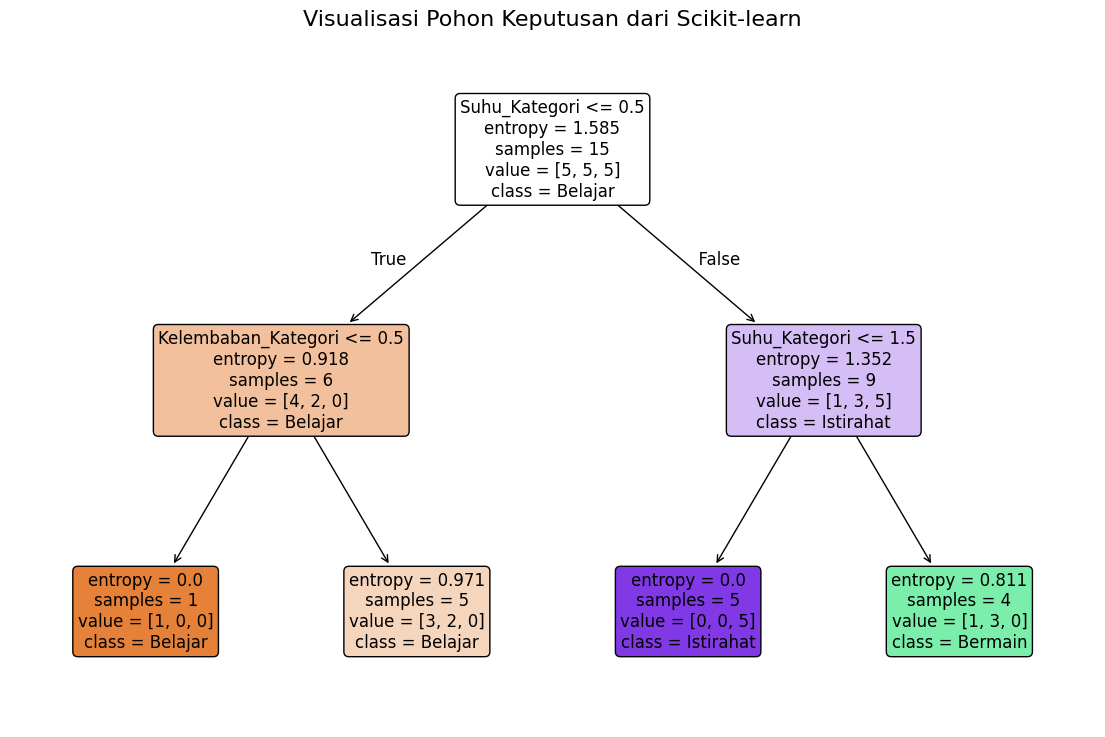

In [ ]:


print("█ PERBANDINGAN DENGAN SCIKIT-LEARN (CARA PROFESIONAL)\n")
# Scikit-learn membutuhkan semua input berupa angka, jadi kita ubah label menjadi angka
df_sklearn = df.copy()
encoders = {}
for col in ['Suhu_Kategori', 'Kelembaban_Kategori', 'Aktivitas']:
    le = LabelEncoder()
    df_sklearn[col] = le.fit_transform(df_sklearn[col])
    encoders[col] = le # Simpan encoder untuk referensi

# Pisahkan fitur (X) dan target (y)
X = df_sklearn[['Suhu_Kategori', 'Kelembaban_Kategori']]
y = df_sklearn['Aktivitas']

# Buat dan latih model Decision Tree
# 'criterion="entropy"' digunakan agar perhitungannya sama dengan Information Gain
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier.fit(X, y)

print("Pohon Keputusan yang dibuat oleh Scikit-learn telah selesai 'dilatih'.")
print("berikut hasil visualisasikan pohon tersebut.")

# Visualisasikan pohonnya
plt.figure(figsize=(14, 9))
plot_tree(dt_classifier,
          feature_names=['Suhu_Kategori', 'Kelembaban_Kategori'],
          class_names=encoders['Aktivitas'].classes_, # Ambil nama kelas asli
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Visualisasi Pohon Keputusan dari Scikit-learn", fontsize=16)
plt.show()

### Memahami Visualisasi Pohon Keputusan Scikit-learn

Visualisasi yang dihasilkan oleh `plot_tree` dari `scikit-learn` adalah representasi grafis dari pohon keputusan yang telah dilatih. Diagram ini merangkum hasil dari proses pembentukan pohon, termasuk simpul pemecahan (splitting nodes) dan daun (leaves).

Mari kita bedah secara mendetail maksud dari setiap elemen di dalam kotak-kotak (disebut **node** atau simpul) tersebut, menggunakan **node paling atas (akar)** sebagai contoh utama.

-----

#### **Struktur dan Informasi dalam Setiap Node**

Setiap kotak pada diagram ini (kecuali node daun) memberikan beberapa informasi penting:

1.  **Aturan Keputusan (Decision Rule)**
    *   Contoh: `Suhu_Kategori <= 0.5`
    *   Ini adalah kondisi yang digunakan node ini untuk memecah data. Data yang memenuhi kondisi ini akan mengikuti cabang kiri, sedangkan yang tidak memenuhi akan mengikuti cabang kanan.
    *   **Penting:** `scikit-learn` menggunakan representasi numerik untuk fitur kategorikal. `Suhu_Kategori` telah di-*encode* menjadi angka (misalnya, 'Dingin'=0, 'Sedang'=1, 'Panas'=2 atau urutan lain tergantung `LabelEncoder`). Jadi, `Suhu_Kategori <= 0.5` setara dengan memeriksa apakah `Suhu_Kategori` adalah kategori yang *di-encode* dengan nilai 0 (dalam kasus ini, kemungkinan 'Dingin').

2.  **Entropy (Ukuran Ketidakpastian)**
    *   Contoh: `entropy = 1.585`
    *   Ini menunjukkan nilai **Entropy** dari semua data yang masuk ke node ini *sebelum* pemecahan dilakukan oleh aturan keputusan di node tersebut.
    *   Untuk node akar, ini adalah Entropy Total dari seluruh dataset awal, yang harusnya **konsisten** dengan perhitungan manual kita.

3.  **Jumlah Sampel (Number of Samples)**
    *   Contoh: `samples = 15`
    *   Ini adalah jumlah total sampel (baris data) yang mencapai node ini.
    *   Di node akar, ini adalah jumlah total data dalam dataset.

4.  **Distribusi Kelas (Class Distribution)**
    *   Contoh: `value = [5, 5, 5]`
    *   Ini adalah daftar yang menunjukkan jumlah sampel untuk setiap kelas target *dalam urutan alfabetis atau urutan encoding* yang digunakan oleh `LabelEncoder`.
    *   Misalnya, jika kelas target Anda adalah ['Belajar', 'Bermain', 'Istirahat'] dan di-*encode* menjadi [0, 1, 2], maka `value = [5, 5, 5]` berarti ada 5 sampel untuk kelas 0 (Belajar), 5 untuk kelas 1 (Bermain), dan 5 untuk kelas 2 (Istirahat).

5.  **Kelas Mayoritas (Majority Class)**
    *   Contoh: `class = Belajar` (Ini akan muncul di node daun atau jika node tidak perlu dipecah lagi)
    *   Ini adalah prediksi kelas untuk semua sampel yang mencapai node ini. Ini ditentukan berdasarkan kelas mayoritas dari `value` pada node tersebut.
    *   Node yang menampilkan `class` tanpa aturan keputusan lebih lanjut adalah **node daun (leaf node)**, yang merupakan titik akhir dari sebuah jalur keputusan.

Dengan memahami elemen-elemen ini di setiap node, kita dapat "membaca" jalur yang diambil oleh setiap sampel data melalui pohon dan bagaimana pohon tersebut sampai pada prediksinya.

* * *

## Kesimpulan

Dalam notebook ini, kita telah menjelajahi algoritma Decision Tree mulai dari konsep dasarnya hingga implementasi praktis.

1.  **Memahami Teori**: Kita memulai dengan memahami konsep inti seperti Entropy (ukuran ketidakpastian) dan Information Gain (efektivitas fitur dalam mengurangi ketidakpastian).
2.  **Perhitungan Manual**: Kita melakukan perhitungan Information Gain secara manual untuk setiap fitur (`Suhu` dan `Kelembaban`) pada dataset contoh, yang memungkinkan kita melihat secara langsung bagaimana fitur terbaik dipilih sebagai simpul akar (root node).
3.  **Implementasi dengan Scikit-learn**: Kita kemudian melihat bagaimana library Scikit-learn mengotomatisasi proses ini menggunakan `DecisionTreeClassifier`. Kita melatih model dengan data yang sama.
4.  **Visualisasi**: Terakhir, kita memvisualisasikan pohon keputusan yang dihasilkan oleh Scikit-learn, dan mempelajari cara membaca setiap node (simpul) untuk memahami aturan keputusan, entropy, jumlah sampel, distribusi kelas, dan prediksi akhir.

Melalui perbandingan antara perhitungan manual dan implementasi dengan Scikit-learn, kita dapat melihat bagaimana prinsip-prinsip Decision Tree diterapkan dalam praktik. Pemilihan fitur berdasarkan Information Gain atau kriteria serupa adalah langkah kunci dalam membangun pohon yang efektif untuk klasifikasi.

* * *